In [12]:
import pynq
from pynq import GPIO

__author__ = "Adam Taylor"
__copyright__ = "Copyright 2020, Adiuvo"
__email__ = "Adam@adiuvoengineering.com"


class xadc_scopeOverlay(pynq.Overlay):
    """.
    """
    def __init__(self, bitfile, **kwargs):
        super().__init__(bitfile, **kwargs)
        if self.is_loaded():
            pass

In [13]:
from pynq import pl
from pynq import overlay
# from pynq.overlays.xadc_scope import xadc_scopeOverlay
#overlay = xadc_scopeOverlay('design_1.bit')
overlay = xadc_scopeOverlay('design_1_230KSPS.bit')
#overlay = xadc_scopeOverlay('design_1_bipolar.bit')

import numpy as np
from pynq import allocate
from pynq import Overlay
import matplotlib.pyplot as mp

input_buffer = allocate(shape=(128,), dtype=np.uint16)

dma = overlay.axi_dma_0
recvstatus = dma.recvchannel.running

dma.buffer_max_size


131071

[1186, 1946, 2144, 2192, 2146, 1990, 1210, 1957, 2285, 2404, 2351, 2194, 1230, 1904, 2334, 2496, 2546, 2546, 1210, 1838, 2217, 2403, 2514, 2456, 1078, 1795, 2160, 2339, 2369, 2328, 1006, 1524, 1912, 2109, 2180, 2116, 869, 1448, 1710, 1888, 1960, 1414, 1620, 1640, 1755, 1796, 1852, 703, 0, 0, 0, 0, 0, 41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 0, 0, 0, 0, 0, 141, 0, 0, 0, 0, 0, 339, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 349, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 306, 0, 0, 0, 0, 0, 224, 0, 0, 0, 0, 0, 313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142, 551, 0, 0, 0, 0, 0, 177, 0, 229, 0, 0, 0, 166, 0, 0, 0, 0, 0, 251, 0, 0, 0, 0, 49, 493, 0, 0, 0, 0, 185, 0, 122, 0, 0, 0, 197, 0, 225, 193, 93, 0, 247, 0, 0, 17, 0, 0, 123, 10, 0, 35, 0, 0, 121, 0, 33, 0, 0, 0, 461, 0, 17, 0, 0, 129, 601, 0, 0, 0, 0, 139, 553, 0, 0, 0, 0, 95, 0, 0, 433, 189, 0, 151, 0, 85, 0, 0, 0, 109, 0, 197, 0, 0, 0, 0, 0, 186, 0, 0, 0, 1, 0, 125, 0, 0, 0, 63

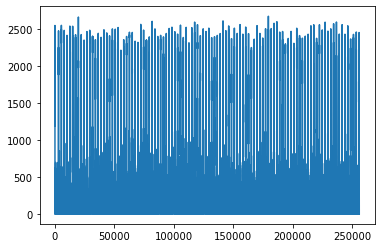

In [171]:
samples = 0
# maxSamples = 1797*128
maxSamples = 2000*128
xAdcVoltages = []
xFiltered = []
while samples < maxSamples:
    dma.recvchannel.transfer(input_buffer)
    dma.recvchannel.wait()
#     print(input_buffer)   
    
    xAdcVoltages += list(input_buffer)
    samples += 128

#     mp.plot(input_buffer)
#     mp.show()
#     mp.clf()

print(xAdcVoltages)
mp.plot(xAdcVoltages)
mp.show()

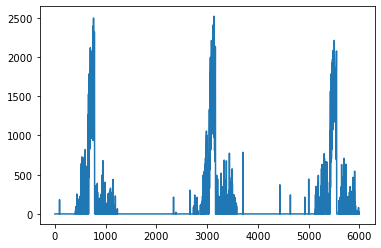

In [172]:
# xFiltered = []
# for i in range(0,len(xAdcVoltages)):
#     if xAdcVoltages[i] < 20000:
#         xFiltered.append(xAdcVoltages[i])
        
mp.plot(xAdcVoltages[50000:56000])
mp.show()

In [11]:
import csv

with open("/home/xilinx/pynq/adc.csv", 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(list(xAdcVoltages[0:100000]))

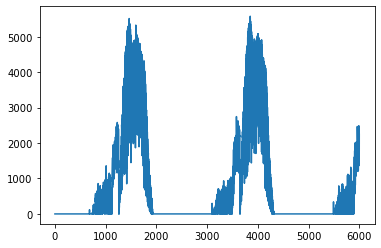

In [167]:
# xFiltered = []
# for i in range(0,len(xAdcVoltages)):
#     if xAdcVoltages[i] < 20000:
#         xFiltered.append(xAdcVoltages[i])
        
mp.plot(xAdcVoltages[50000:56000])
mp.show()